# Explore here

In [55]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import utils as eda
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
df = adult.data.original
display(df.head(3))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [57]:
eda.analisis(df)

Variables numéricas: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Variables no numéricas: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

Shape del dataset: (48842, 15)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-

In [58]:
print("Valores nulos por columna antes:")
display(df.isnull().sum())

cols_nulls = ["workclass", "occupation", "native-country"]

for col in cols_nulls:
    
    moda_value = df[col].mode()[0]
    df[col] = df[col].fillna(moda_value)
print("\nCOMPLETADO")
print("Valores nulos por columna despues de sustituir por la moda:")
display(df.isnull().sum())

Valores nulos por columna antes:


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


COMPLETADO
Valores nulos por columna despues de sustituir por la moda:


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

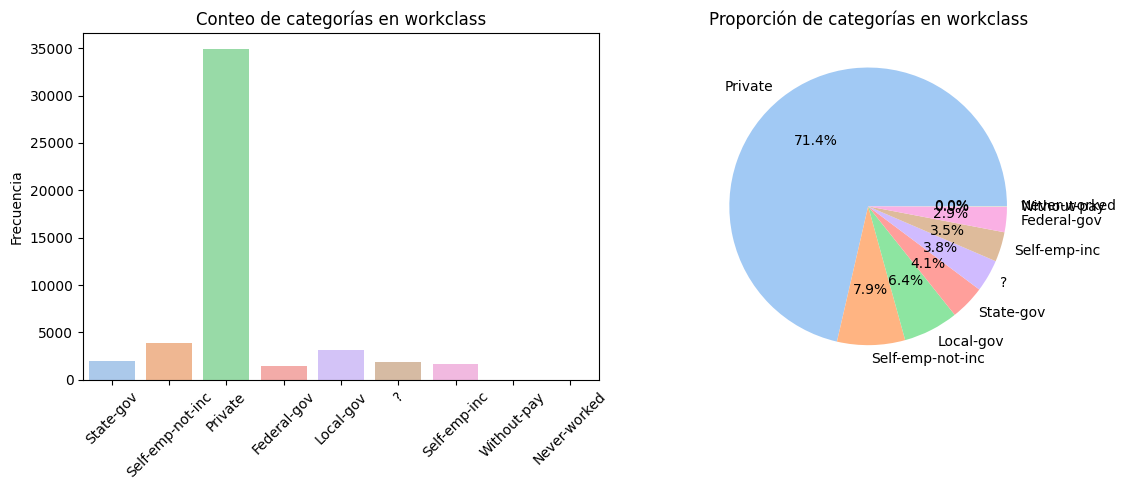

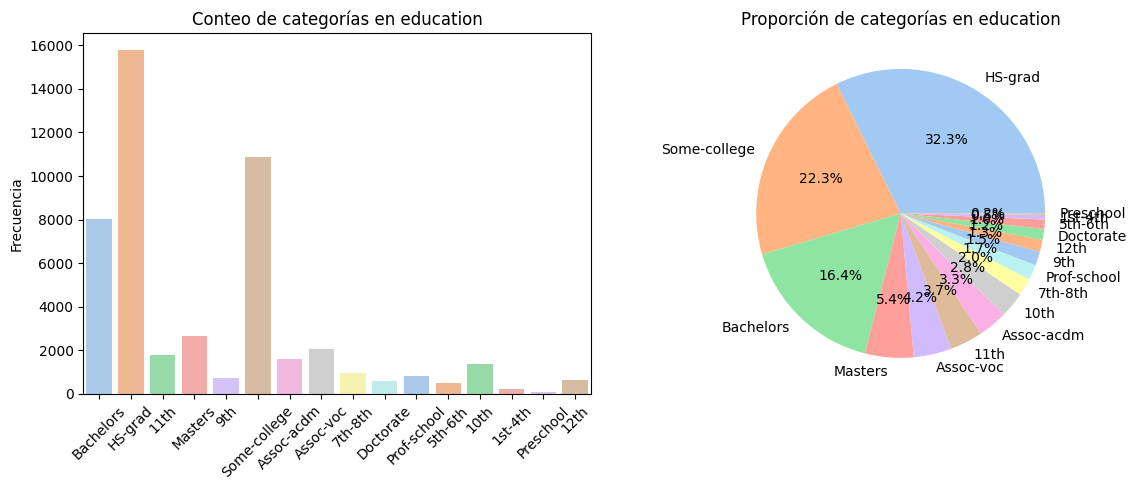

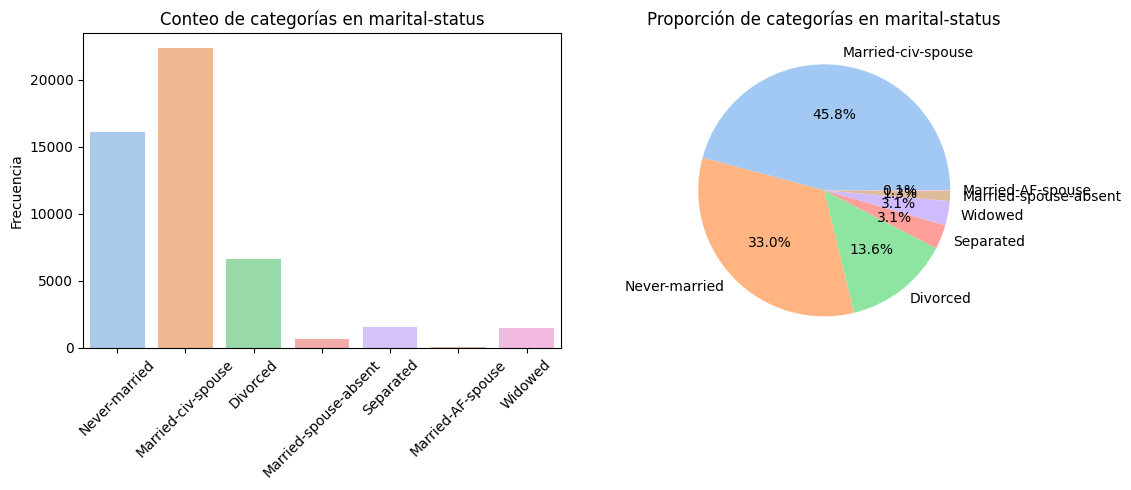

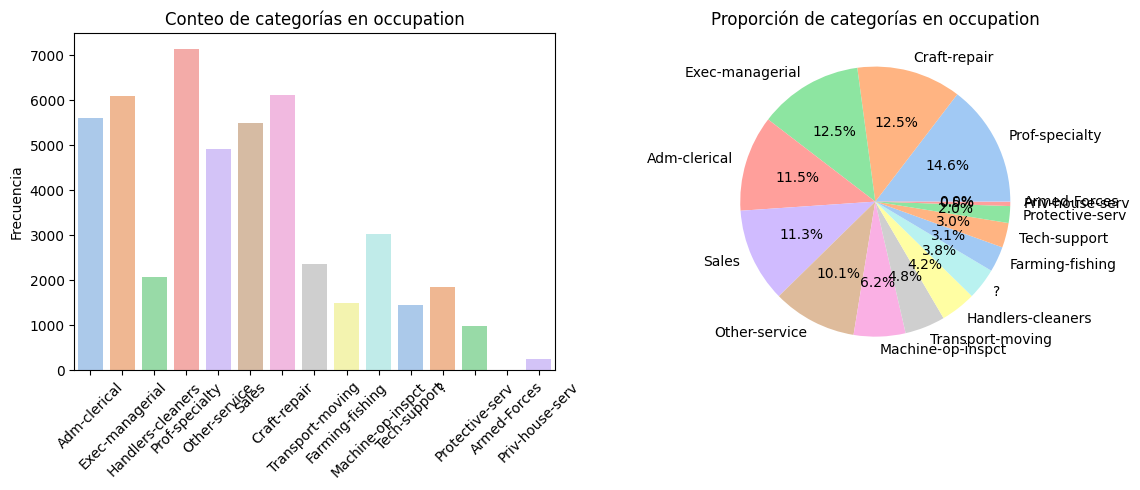

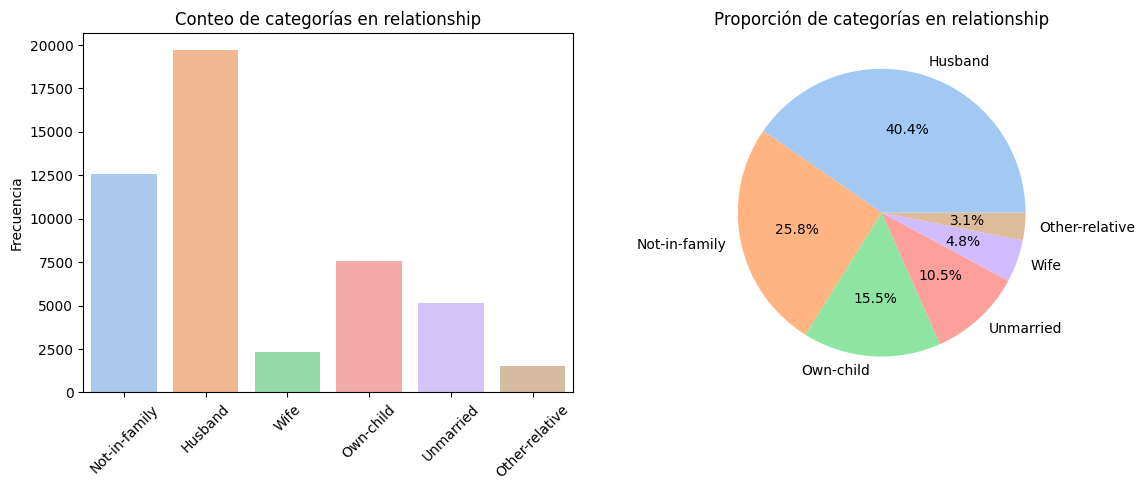

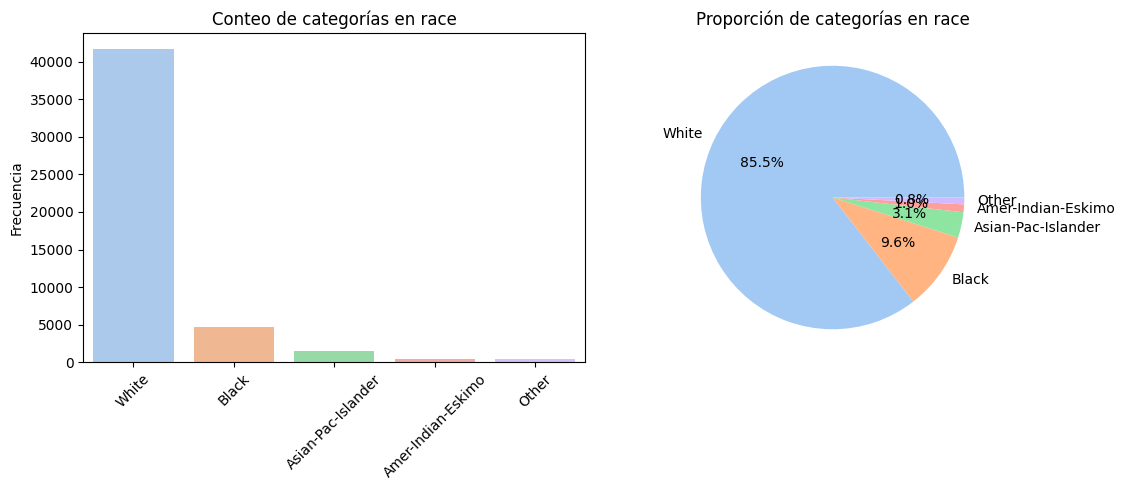

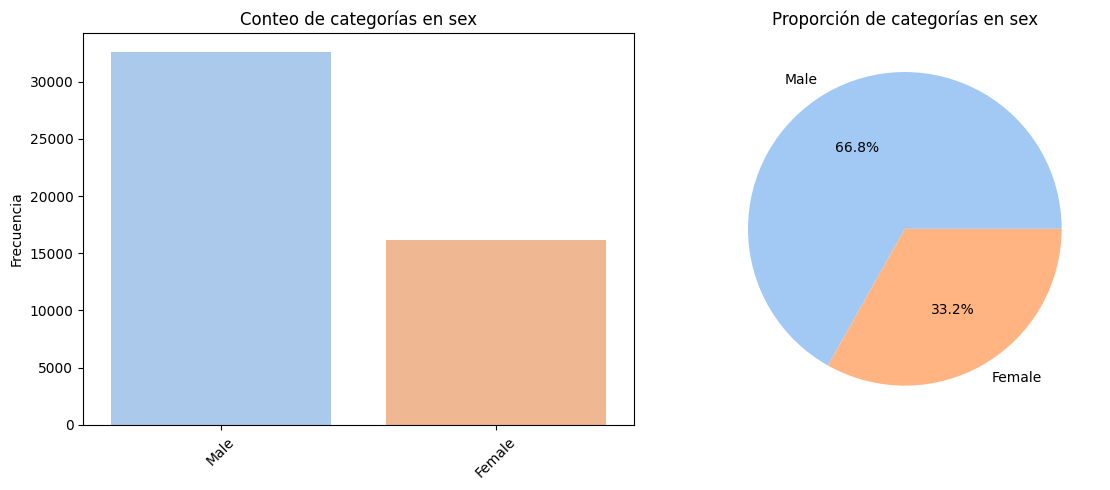

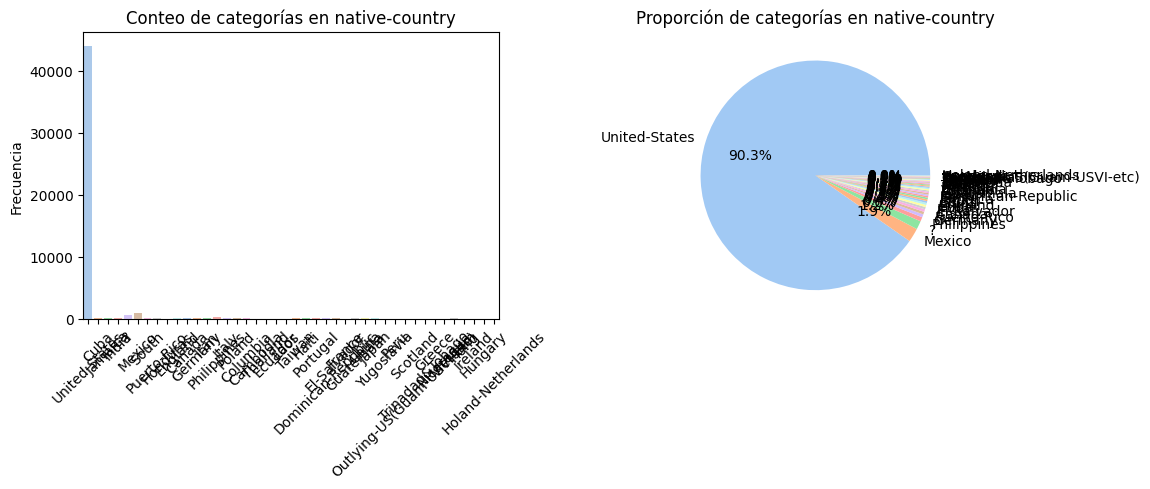

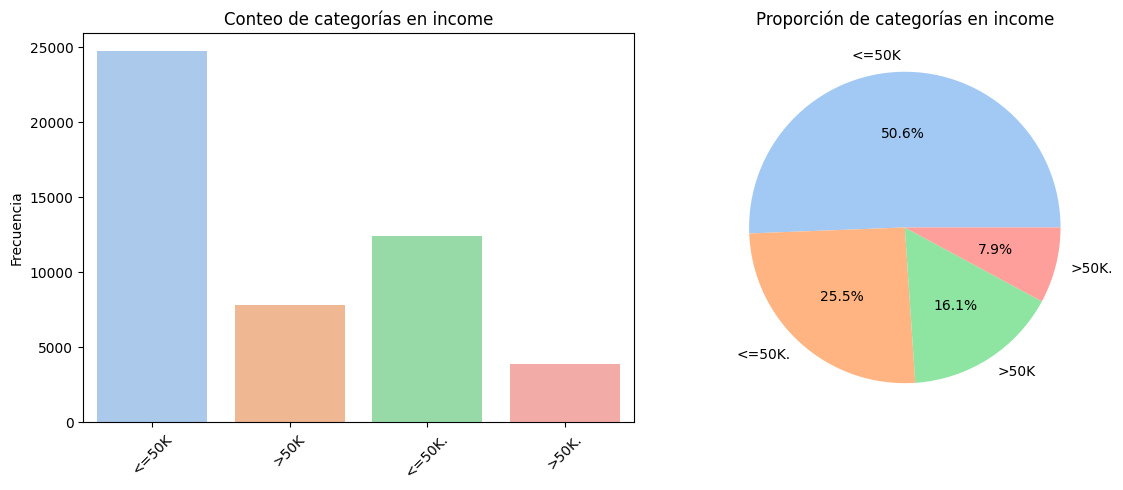

In [59]:
eda.plot_categorical_data(df)

Analisis de resultados: 
1. Private: es por mucho, la categoría dominante, con más de 35,000 registros.
Le siguen bastante distantes:
Self-emp-not-inc (~4000 registros).
Local-gov (~3000 registros).
State-gov (~2000 registros).

2. education:       
Concentración en niveles medios: La mayoría de los individuos alcanza secundaria completa (HS-grad) o algo de universidad (Some-college).
Educación superior: Aunque existen grupos con Bachelors, Masters, Doctorates, son menos frecuentes que los de educación media.
Niveles bajos (≤9th, 1st-4th, Preschool): Su frecuencia es muy baja, lo que refleja que pocos individuos en la muestra tienen educación básica incompleta.
Desbalance en clases: Similar al caso de workclass, hay un fuerte desbalance entre categorías muy frecuentes (HS-grad, Some-college, Bachelors) vs. categorías raras.

3. Marital_status: Hay un claro predominio de personas casadas (Married-civ-spouse) y nunca casadas (Never-married), entre las dos concentran más del 70% de la muestra.
El grupo divorciado también es significativo, mientras que las demás categorías tienen un peso marginal.
Existe un alto desbalance en las clases, lo cual puede ser importante a considerar si esta variable se incluye en un modelo predictivo.

4. Relationship:
Existe un claro sesgo hacia “Husband”, lo que refleja la estructura del dataset (probablemente el censo identifica más a los hombres casados como jefes de hogar).
Muchas personas se registran como independientes (“Not-in-family” y “Unmarried”), mostrando gran diversidad en las formas de hogar.
Baja representación de Wife frente a Husband.

5. Native_country:
Esto genera serios problemas de representatividad en modelos de machine learning si se intenta usar native-country como predictor, porque:
United-States ≈ 95%+, lo que puede hacer irrelevante la distinción con los demás países.
Las clases con pocas muestras pueden perder importancia o incluso introducir ruido.

In [60]:
print(f"tamaño antes eliminación: {df.shape}")

df.drop(['education-num','marital-status','native-country','fnlwgt'], axis=1, inplace=True)

print("Eliminacioncompletado")
print(f"tamaño despues eliminación: {df.shape}")

tamaño antes eliminación: (48842, 15)
Eliminacioncompletado
tamaño despues eliminación: (48842, 11)


In [61]:
# Separamos variables numéricas y categóricas
numericas = df.select_dtypes(include=['int64', 'float64'])
no_numericas = df.select_dtypes(include=['object'])

print("Columnas numéricas:", numericas.columns.tolist())
print("Columnas categóricas:", no_numericas.columns.tolist())

Columnas numéricas: ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
Columnas categóricas: ['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'income']


In [62]:
# Limpiar espacios en blanco en las categóricas
for col in no_numericas.columns:
    no_numericas[col] = no_numericas[col].str.strip()

# Verificar si aún quedan valores "?" como mal codificados
for col in no_numericas.columns:
    if (no_numericas[col] == '?').any():
        moda_value = no_numericas[col].mode()[0]
        no_numericas[col] = no_numericas[col].replace('?', moda_value)

# Transformación one-hot encoding
no_numericas_encoded = pd.get_dummies(no_numericas, drop_first=True)
print("COMPLETADO")
print(no_numericas_encoded.head(3))

COMPLETADO
   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False              False   
1                False                   False              False   
2                False                   False               True   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                   False                       False                 True   
1                   False                        True                False   
2                   False                       False                False   

   workclass_Without-pay  education_11th  education_12th  education_1st-4th  \
0                  False           False           False              False   
1                  False           False           False              False   
2                  False           False           False              False   

   ...  relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0  .

In [63]:
scaler = MinMaxScaler()
numericas_scaled = pd.DataFrame(scaler.fit_transform(numericas),
                                columns=numericas.columns)

# Todo listo: dataset final
total_data = pd.concat([numericas_scaled, no_numericas_encoded], axis=1)

print("Tamaño final después del preprocesamiento:", total_data.shape)
display(total_data.head(3))

Tamaño final después del preprocesamiento: (48842, 52)


,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_<=50K.,income_>50K,income_>50K.
0,0.301370,0.02174,0.0,0.397959,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,False
1,0.452055,0.00000,0.0,0.122449,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
2,0.287671,0.00000,0.0,0.397959,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False


Analisis de la recomendacion:
1. Recomendar trabajos/ocupaciones o sectores laborales adecuados a un individuo, basándonos en su perfil (edad, educación, experiencia, etc.).
2. se podría recomendar acciones educativas o formativas, sugerir un nivel académico que aumente la probabilidad de superar cierto nivel de ingresos.

Ocupacion como iten a recomendar.

Analisis de Usuario:
El usuario será cada individuo/información demográfica de una persona registrada en el dataset.
Es decir, el sistema construirá un perfil de usuario a partir de:

Variables sociales.
Nivel educativo.
Trabajo/relación laboral.
Horas trabajadas por semana, capital-gain/loss (indicadores económicos).


Aanalisis de variables que definen el usuario:
1. age (edad).
2. capital-gain y capital-loss (indicadores de ingresos/pérdidas).
3. hours-per-week (horas trabajadas/semana).
4. workclass (sector laboral).
5. education (nivel educativo).
6. relationship y sex.
7. race.

In [64]:
# Construcción de la matriz usuario–ocupación

user_item_matrix = pd.crosstab(df.index, df['occupation'])
print("COMPLETADO")

COMPLETADO


In [65]:
# Correlación entre ocupaciones
ocupacion_corr = user_item_matrix.corr(method='pearson')

def recomendar_por_items(ocupacion_base, k=5):
    similares = ocupacion_corr[ocupacion_base].dropna().sort_values(ascending=False)[1:k+1]
    return similares

print("Ocupaciones similares a 'Prof-specialty':")
print(recomendar_por_items('Prof-specialty'))

Ocupaciones similares a 'Prof-specialty':
occupation
Armed-Forces      -0.007251
Priv-house-serv   -0.029194
Protective-serv   -0.059292
Tech-support      -0.072262
Farming-fishing   -0.073388
Name: Prof-specialty, dtype: float64


In [66]:

# Matriz de correlación entre ocupaciones 
ocupacion_corr = user_item_matrix.corr(method='pearson')
print("COMPLETADO")

COMPLETADO


In [68]:
# Definimos la función de recomendación 


def recomendar_para_usuario(user_id, k=5):
    # Ocupación actual del usuario
    ocupaciones_usuario = user_item_matrix.columns[user_item_matrix.loc[user_id] > 0]

    if len(ocupaciones_usuario) == 0:
        return f"Usuario {user_id} no tiene ocupación asignada"

    ocupacion_actual = ocupaciones_usuario[0]

    # Buscar ocupaciones similares a la actual
    similares = ocupacion_corr[ocupacion_actual].dropna().sort_values(
        ascending=False
    )[1:k+1]  # quitamos la ocupación propia
    
    return {
        "ocupacion_actual": ocupacion_actual,
        "recomendaciones": similares.index.tolist()
    }
print("COMPLETADO")

COMPLETADO


In [71]:
# Definir el usuario a evaluar

user_id = 2100
# Probar con el usuario
resultado = recomendar_para_usuario(user_id, k=10)

print(f"RECOMENDACIONES PARA USUARIO {user_id}")
print(resultado)

print(f"\nOcupación actual del usuario {user_id}: {resultado['ocupacion_actual']}")
print(f"Top-3 ocupaciones recomendadas para usuario {user_id}:")
for i, ocupacion in enumerate(resultado['recomendaciones'], 1):
    print(f"  {i}. {ocupacion}")

print(f"\nPERFIL COMPLETO DEL USUARIO {user_id} EN DF")
print(df.loc[user_id])

RECOMENDACIONES PARA USUARIO 2100
{'ocupacion_actual': 'Exec-managerial', 'recomendaciones': ['Armed-Forces', 'Priv-house-serv', 'Protective-serv', 'Tech-support', 'Farming-fishing', '?', 'Handlers-cleaners', 'Transport-moving', 'Machine-op-inspct', 'Other-service']}

Ocupación actual del usuario 2100: Exec-managerial
Top-3 ocupaciones recomendadas para usuario 2100:
  1. Armed-Forces
  2. Priv-house-serv
  3. Protective-serv
  4. Tech-support
  5. Farming-fishing
  6. ?
  7. Handlers-cleaners
  8. Transport-moving
  9. Machine-op-inspct
  10. Other-service

PERFIL COMPLETO DEL USUARIO 2100 EN DF
age                            47
workclass               State-gov
education               Bachelors
occupation        Exec-managerial
relationship        Not-in-family
race                        White
sex                        Female
capital-gain                    0
capital-loss                    0
hours-per-week                 40
income                       >50K
Name: 2100, dtype: obj